In [2]:
import numpy as np
import pandas as pd
from klearn import *
import random 
import matplotlib.pyplot as plt

In [7]:
#Intitializing constant parameter
no_of_samples = 50
no_of_feature = 100
train_sample_size = int(no_of_samples*(30/100))
test_sample_size = no_of_samples - train_sample_size
INDUCE_ERROR = 0.02

In [5]:
#generating random Values
x = np.random.randn(no_of_samples , no_of_feature) #create random numbers 
coefficients = 3*np.random.randn(no_of_feature) #Creating Co -efficients for the fit
indices = np.arange(no_of_feature)

np.random.shuffle(indices) #Shuffle indices

coefficients[indices[15:]]= 0
y= np.dot(x,coefficients)  #Generating the dependent variable values i.e Y values

In [8]:
#Adding noise to Y
y += INDUCE_ERROR * np.random.normal(no_of_feature)#Introducing a small amount of deviation in the values of the Y array

In [15]:
len(x[0]), y[0]

(100, -6.9447071553448145)

In [16]:
x_train , x_test = np.split(x,[train_sample_size,])
y_train , y_test = np.split(y, [train_sample_size])

#initializing Ridge , Lasso and ElasticNet
ridge = linear_model.Ridge(alpha=0.1)
lasso = linear_model.Lasso(alpha=0.1)
e_net = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)

In [18]:
#Training Our Model
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
e_net.fit(x_train , y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
#calculatin r^2 score for the Models
predictions_ridge = ridge.predict(x_test)
prediction_lasso = lasso.predict(x_test)
prediction_enet = e_net.predict(x_test)

In [20]:
# Score of all method
score_ridge = metrics.r2_score(y_test , predictions_ridge)
score_lasso = metrics.r2_score(y_test , prediction_lasso)
score_enet = metrics.r2_score(y_test,  prediction_enet)

In [21]:
#Displaying the results and the graph
print("R-Squared Value for Ridge regression", score_ridge)
print("R-Squared Value for Lasso regression", score_lasso)
print("R-Squared Value for enet regression", score_enet)

R-Squared Value for Ridge regression 0.051335227455945986
R-Squared Value for Lasso regression 0.3039640590546574
R-Squared Value for enet regression 0.13473084000023428


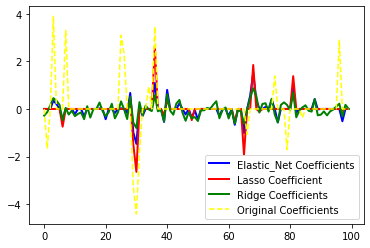

In [22]:
plt.plot(e_net.coef_ , color = "b", linewidth =2 , label ="Elastic_Net Coefficients")
plt.plot(lasso.coef_, color = "r", linewidth = 2 , label = "Lasso Coefficient")
plt.plot(ridge.coef_ , color = "green" , linewidth = 2 , label = "Ridge Coefficients" )
plt.plot(coefficients , "--",  color = 'yellow', label = "Original Coefficients")
plt.legend(loc = "best")
plt.show()